In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [2]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)

data_li_2013 = np.genfromtxt('enso-li2013_nino3.4_v1.txt', delimiter=",", dtype=float) # nino 3.4 reconstruction 
# To address these challenges, we compile and synthesize 2,222 tree-ring chronologies from both the tropics and 
# mid-latitudes of both hemispheres to reconstruct ENSO variability for the past seven centuries.


The multi-taper method14 spectral analysis reveals that significant ENSO periodicities fall within interannual (2–7 years) and decadal (8–13 years) bands 
 Before the SEA, the reconstructed Niño3.4 SSTs were processed using a 9-yr high-pass filter to isolate interannual variability. 

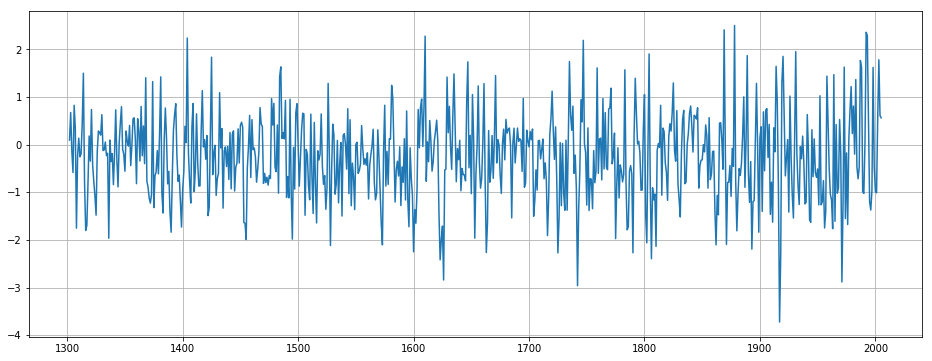

In [3]:
year_li_2013 = data_li_2013[:,0]
nino3_li_2013 = data_li_2013[:,1]
plt.figure(figsize=(16,6))
plt.plot(data_li_2013[:,0], data_li_2013[:,1])
plt.grid()
#print(year_li_2013)

In [4]:
from scipy.signal import butter, lfilter

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, cutoff, btype='high', analog=False)
    return b, a


def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

0.8496626821347035


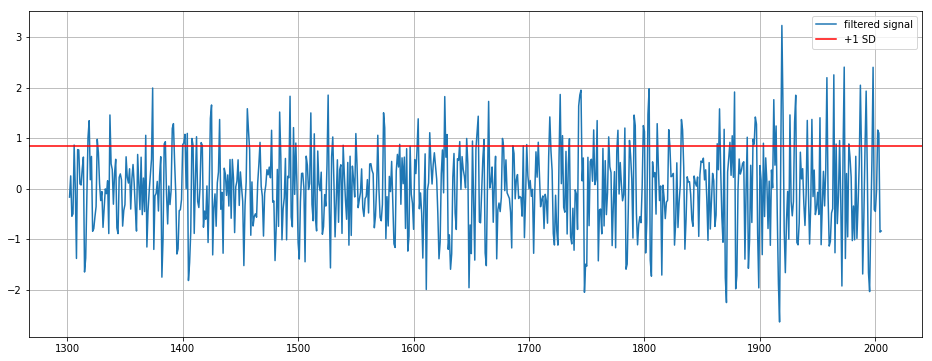

In [5]:
fs = 1 # 120 data points collected per 10 years
cutoff = 1/9
nino3_li_2013_filt = butter_highpass_filter(nino3_li_2013, cutoff, fs, order=4)
plt.figure(figsize=(16,6))
plt.plot(year_li_2013, nino3_li_2013_filt, label='filtered signal')
plt.axhline(y=np.std(nino3_li_2013_filt), color='r', linestyle='-', label='+1 SD')
plt.grid()
plt.legend()
print(np.std(nino3_li_2013_filt))

In [6]:
event_en_li = np.zeros((year_li_2013.shape[0]))
event_en_li[nino3_li_2013_filt>=np.std(nino3_li_2013_filt)] = 1.0

event_ln_li = np.zeros((year_li_2013.shape[0]))
event_ln_li[nino3_li_2013_filt<=-np.std(nino3_li_2013_filt)] = 1.0

In [7]:
event_yy_volc_all = np.zeros((year_li_2013.shape[0]))
event_yy_volc_strong = np.zeros((year_li_2013.shape[0]))
event_yy_volc_all_trop = np.zeros((year_li_2013.shape[0]))
event_yy_volc_all_nh = np.zeros((year_li_2013.shape[0]))
event_yy_volc_all_sh = np.zeros((year_li_2013.shape[0]))
event_yy_volc_strong_trop = np.zeros((year_li_2013.shape[0]))
event_yy_volc_strong_nh = np.zeros((year_li_2013.shape[0]))
event_yy_volc_strong_sh = np.zeros((year_li_2013.shape[0]))

In [8]:
for i in range(year_li_2013.shape[0]):
    #print(event_yy_kobb[i])
    idx = np.asarray(np.where(volc[:,0] == year_li_2013[i]))
    #print(idx.size)
    if idx.size==0:
        continue
    event_yy_volc_all[i] = 1.0
    if np.abs(volc[idx[0,0],2])>=5.0:
        event_yy_volc_strong[i] = 1.0
    
    if volc[idx[0,0],1] == 1.0:
        event_yy_volc_all_trop[i] = 1.0
    if volc[idx[0,0],1] == 2.0:
        event_yy_volc_all_nh[i] = 1.0
    if volc[idx[0,0],1] == 3.0:
        event_yy_volc_all_sh[i] = 1.0
        
    if (volc[idx[0,0],1] == 1.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_trop[i] = 1.0
    if (volc[idx[0,0],1] == 2.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_nh[i] = 1.0
    if (volc[idx[0,0],1] == 3.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_sh[i] = 1.0

In [9]:
np.savetxt('el_nino_li_2013.txt', event_en_li, delimiter=",")
np.savetxt('all_volc_li_2013.txt', event_yy_volc_all, delimiter=",")
np.savetxt('strong_volc_li_2013.txt', event_yy_volc_strong, delimiter=",")
np.savetxt('all_tropical_li_2013.txt', event_yy_volc_all_trop, delimiter=",")
np.savetxt('strong_tropical_li_2013.txt', event_yy_volc_strong_trop, delimiter=",")
np.savetxt('all_nh_li_2013.txt', event_yy_volc_all_nh, delimiter=",")
np.savetxt('strong_nh_li_2013.txt', event_yy_volc_strong_nh, delimiter=",")
np.savetxt('all_sh_li_2013.txt', event_yy_volc_all_sh, delimiter=",")
np.savetxt('strong_sh_li_2013.txt', event_yy_volc_strong_sh, delimiter=",")

In [10]:
print(np.sum(event_yy_volc_all))
print(np.sum(event_yy_volc_strong))
print(np.sum(event_yy_volc_all_trop))
print(np.sum(event_yy_volc_strong_trop))
print(np.sum(event_yy_volc_all_nh))
print(np.sum(event_yy_volc_strong_nh))
print(np.sum(event_yy_volc_all_sh))
print(np.sum(event_yy_volc_strong_sh))

89.0
14.0
26.0
16.0
45.0
1.0
18.0
0.0


In [11]:
# Bootstrap
N = 1000
win = 5
count_elnino_all_volc = np.zeros((N, win))
count_elnino_strong_volc  = np.zeros((N, win))
count_elnino_all_trop  = np.zeros((N, win))
count_elnino_strong_trop  = np.zeros((N, win))
count_elnino_all_nh  = np.zeros((N, win))
count_elnino_strong_nh  = np.zeros((N, win))
count_elnino_all_sh  = np.zeros((N, win))

In [12]:
idx_all = np.asarray(np.where(event_yy_volc_all == 1.0))
idx_strong = np.asarray(np.where(event_yy_volc_strong == 1.0))
idx_all_trop = np.asarray(np.where(event_yy_volc_all_trop == 1.0))
idx_strong_trop = np.asarray(np.where(event_yy_volc_strong_trop == 1.0))
idx_all_nh = np.asarray(np.where(event_yy_volc_all_nh == 1.0))
idx_strong_nh = np.asarray(np.where(event_yy_volc_strong_nh == 1.0))
idx_all_sh = np.asarray(np.where(event_yy_volc_all_sh == 1.0))

In [13]:
print(idx_all[0])

[  5  28  35  40  44  77  80  88 107 113 115 140 147 152 157 162 169 176
 177 179 201 204 211 227 236 240 253 266 275 284 289 294 300 318 320 336
 340 345 353 361 366 372 392 394 407 418 419 420 424 428 438 455 461 465
 469 482 485 495 496 508 514 520 522 531 535 545 552 555 561 572 574 583
 586 589 602 607 611 618 624 625 630 642 646 656 663 667 678 681 690]


In [14]:
nino3_li_2013_filt_norm = (nino3_li_2013_filt - np.mean(nino3_li_2013_filt))/(np.std(nino3_li_2013_filt))
niter = 0
while niter<N:
    rand_year_all = random.sample(list(idx_all[0]), 1)
    if (rand_year_all[0]<nino3_li_2013_filt_norm.shape[0]-win):
        count_elnino_all_volc[niter,:] = nino3_li_2013_filt_norm[rand_year_all[0]:rand_year_all[0]+win]
    
    rand_year_strong = random.sample(list(idx_strong[0]), 1)
    if (rand_year_strong[0]<nino3_li_2013_filt_norm.shape[0]-win):
        count_elnino_strong_volc[niter,:] = nino3_li_2013_filt_norm[rand_year_strong[0]:rand_year_strong[0]+win]
    
    rand_year_all_trop = random.sample(list(idx_all_trop[0]), 1)
    if (rand_year_all_trop[0]<nino3_li_2013_filt_norm.shape[0]-win):
        count_elnino_all_trop[niter,:] = nino3_li_2013_filt_norm[rand_year_all_trop[0]:rand_year_all_trop[0]+win]

    rand_year_strong_trop = random.sample(list(idx_strong_trop[0]), 1)
    if (rand_year_strong_trop[0]<nino3_li_2013_filt_norm.shape[0]-win):
        count_elnino_strong_trop[niter,:] = nino3_li_2013_filt_norm[rand_year_strong_trop[0]:rand_year_strong_trop[0]+win]

    rand_year_all_nh = random.sample(list(idx_all_nh[0]), 1)
    if (rand_year_all_nh[0]<nino3_li_2013_filt_norm.shape[0]-win):
        count_elnino_all_nh[niter,:] = nino3_li_2013_filt_norm[rand_year_all_nh[0]:rand_year_all_nh[0]+win]

    rand_year_strong_nh = random.sample(list(idx_strong_nh[0]), 1)
    if (rand_year_strong_nh[0]<nino3_li_2013_filt_norm.shape[0]-win):
        count_elnino_strong_nh[niter,:] = nino3_li_2013_filt_norm[rand_year_strong_nh[0]:rand_year_strong_nh[0]+win]

    rand_year_all_sh = random.sample(list(idx_all_sh[0]), 1)
    if (rand_year_all_sh[0]<nino3_li_2013_filt_norm.shape[0]-win):
        count_elnino_all_sh[niter,:] = nino3_li_2013_filt_norm[rand_year_all_sh[0]:rand_year_all_sh[0]+win]
    
    #print(s[rand_year_all[0]:rand_year_all[0]+win])
    #print(rand_year_all[0])
    niter = niter + 1 

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


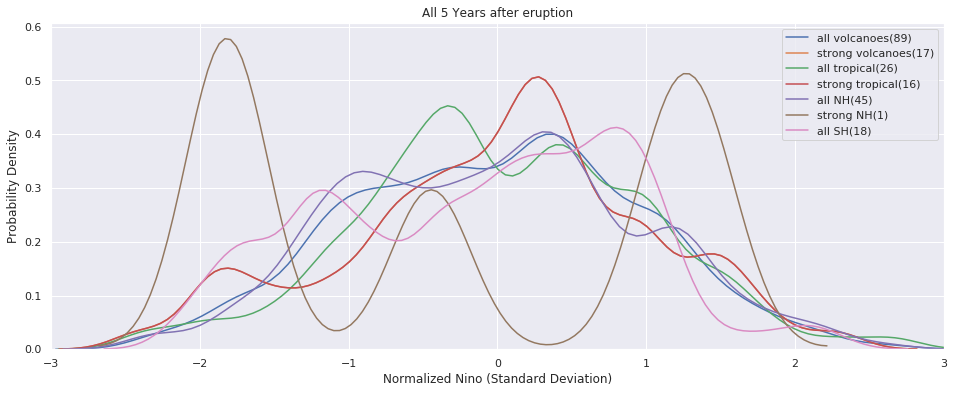

In [15]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc.flatten(), label='all volcanoes(89)')
sns.kdeplot(count_elnino_strong_volc.flatten(), label='strong volcanoes(17)')
sns.kdeplot(count_elnino_all_trop.flatten(), label='all tropical(26)')
sns.kdeplot(count_elnino_strong_volc.flatten(), label='strong tropical(16)')
sns.kdeplot(count_elnino_all_nh.flatten(), label='all NH(45)')
sns.kdeplot(count_elnino_strong_nh.flatten(), label='strong NH(1)')
sns.kdeplot(count_elnino_all_sh.flatten(), label='all SH(18)')
plt.title('All 5 Years after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value 

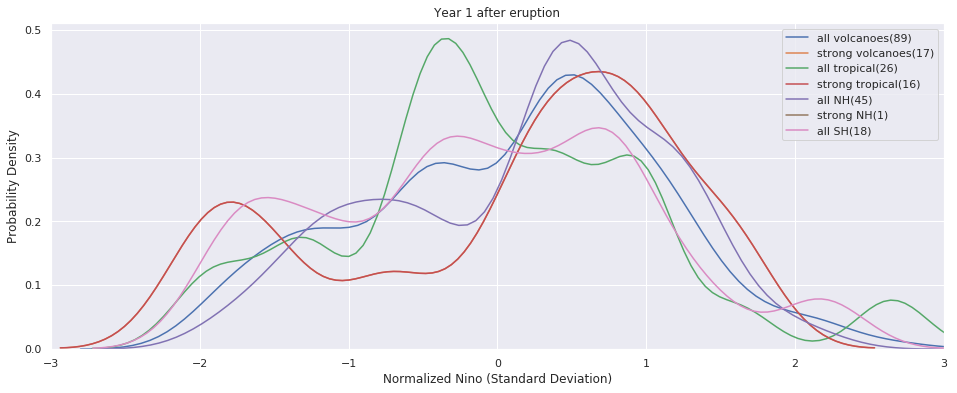

In [16]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,0], label='all volcanoes(89)')
sns.kdeplot(count_elnino_strong_volc[:,0], label='strong volcanoes(17)')
sns.kdeplot(count_elnino_all_trop[:,0], label='all tropical(26)')
sns.kdeplot(count_elnino_strong_volc[:,0], label='strong tropical(16)')
sns.kdeplot(count_elnino_all_nh[:,0], label='all NH(45)')
sns.kdeplot(count_elnino_strong_nh[:,0], label='strong NH(1)')
sns.kdeplot(count_elnino_all_sh[:,0], label='all SH(18)')
plt.title('Year 1 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value 

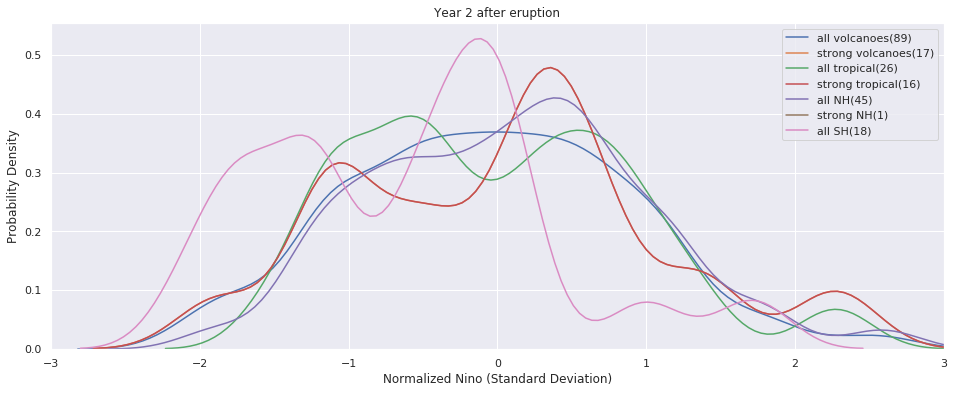

In [17]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,1], label='all volcanoes(89)')
sns.kdeplot(count_elnino_strong_volc[:,1], label='strong volcanoes(17)')
sns.kdeplot(count_elnino_all_trop[:,1], label='all tropical(26)')
sns.kdeplot(count_elnino_strong_volc[:,1], label='strong tropical(16)')
sns.kdeplot(count_elnino_all_nh[:,1], label='all NH(45)')
sns.kdeplot(count_elnino_strong_nh[:,1], label='strong NH(1)')
sns.kdeplot(count_elnino_all_sh[:,1], label='all SH(18)')
plt.title('Year 2 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value 

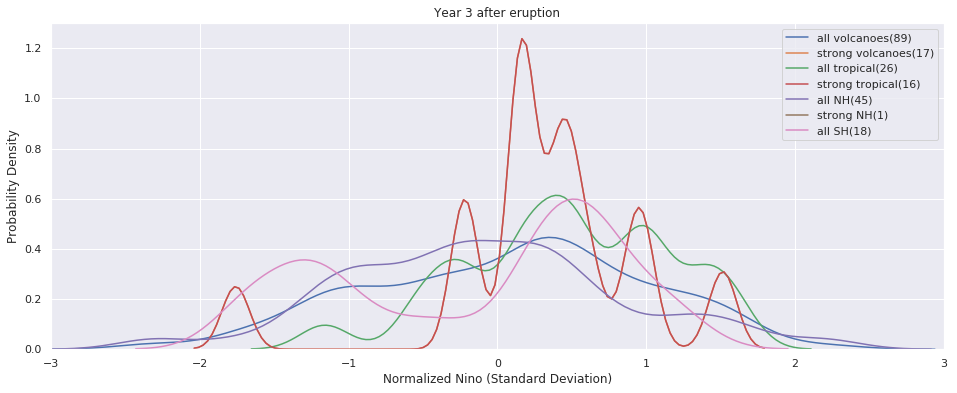

In [18]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,2], label='all volcanoes(89)')
sns.kdeplot(count_elnino_strong_volc[:,2], label='strong volcanoes(17)')
sns.kdeplot(count_elnino_all_trop[:,2], label='all tropical(26)')
sns.kdeplot(count_elnino_strong_volc[:,2], label='strong tropical(16)')
sns.kdeplot(count_elnino_all_nh[:,2], label='all NH(45)')
sns.kdeplot(count_elnino_strong_nh[:,2], label='strong NH(1)')
sns.kdeplot(count_elnino_all_sh[:,2], label='all SH(18)')
plt.title('Year 3 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value 

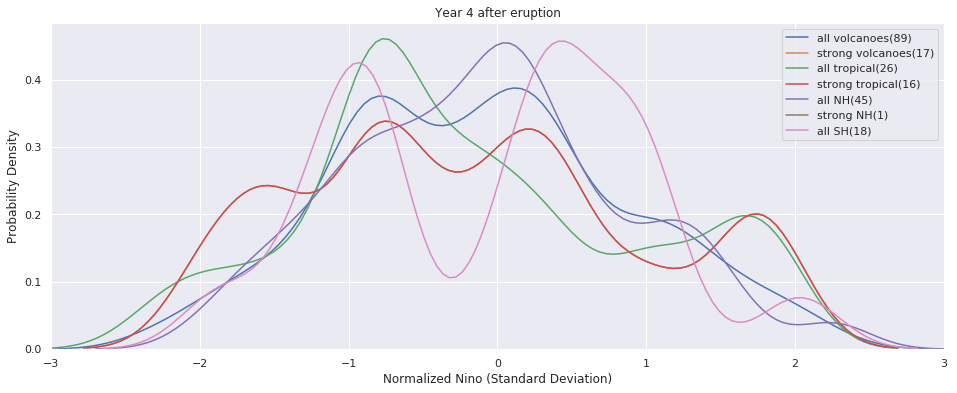

In [19]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,3], label='all volcanoes(89)')
sns.kdeplot(count_elnino_strong_volc[:,3], label='strong volcanoes(17)')
sns.kdeplot(count_elnino_all_trop[:,3], label='all tropical(26)')
sns.kdeplot(count_elnino_strong_volc[:,3], label='strong tropical(16)')
sns.kdeplot(count_elnino_all_nh[:,3], label='all NH(45)')
sns.kdeplot(count_elnino_strong_nh[:,3], label='strong NH(1)')
sns.kdeplot(count_elnino_all_sh[:,3], label='all SH(18)')
plt.title('Year 4 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value 

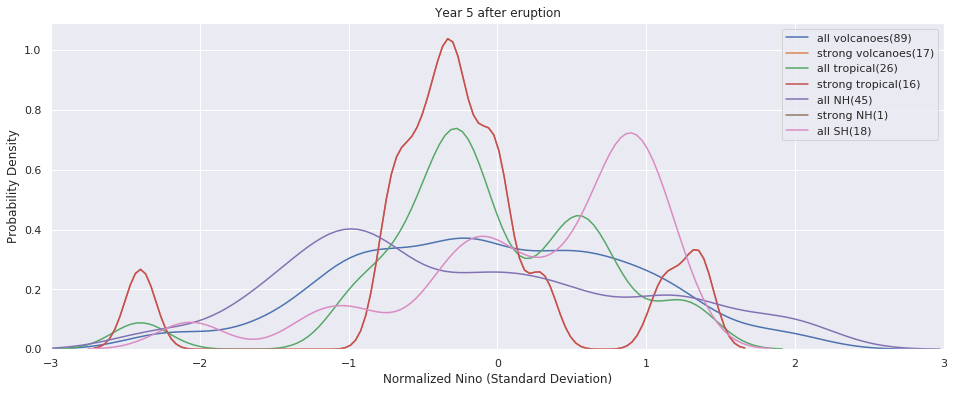

In [20]:
import seaborn as sns; sns.set(color_codes=True)
plt.figure(figsize=(16,6))
sns.kdeplot(count_elnino_all_volc[:,4], label='all volcanoes(89)')
sns.kdeplot(count_elnino_strong_volc[:,4], label='strong volcanoes(17)')
sns.kdeplot(count_elnino_all_trop[:,4], label='all tropical(26)')
sns.kdeplot(count_elnino_strong_volc[:,4], label='strong tropical(16)')
sns.kdeplot(count_elnino_all_nh[:,4], label='all NH(45)')
sns.kdeplot(count_elnino_strong_nh[:,4], label='strong NH(1)')
sns.kdeplot(count_elnino_all_sh[:,4], label='all SH(18)')
plt.title('Year 5 after eruption')
plt.ylabel('Probability Density')
plt.xlabel('Normalized Nino (Standard Deviation)')
plt.xlim([-3,3])
plt.legend()

In [21]:
# Bootstrap
N = 1000
win = 20
count_elnino_all_volc = np.zeros((N))
count_elnino_strong_volc  = np.zeros((N))
count_elnino_all_trop  = np.zeros((N))
count_elnino_strong_trop  = np.zeros((N))
count_elnino_all_nh  = np.zeros((N))
count_elnino_strong_nh  = np.zeros((N))
count_elnino_all_sh  = np.zeros((N))

In [22]:
niter = 0
while niter<N:
    rand_year_all = random.sample(list(idx_all[0]), 1)
    if (rand_year_all[0]<event_en_li.shape[0]-win):
        count_elnino_all_volc[niter] = np.sum(event_en_li[rand_year_all[0]:rand_year_all[0]+win])
    
    rand_year_strong = random.sample(list(idx_strong[0]), 1)
    if (rand_year_strong[0]<event_en_li.shape[0]-win):
        count_elnino_strong_volc[niter] = np.sum(event_en_li[rand_year_strong[0]:rand_year_strong[0]+win])
    
    rand_year_all_trop = random.sample(list(idx_all_trop[0]), 1)
    if (rand_year_all_trop[0]<event_en_li.shape[0]-win):
        count_elnino_all_trop[niter] = np.sum(event_en_li[rand_year_all_trop[0]:rand_year_all_trop[0]+win])

    rand_year_strong_trop = random.sample(list(idx_strong_trop[0]), 1)
    if (rand_year_strong_trop[0]<event_en_li.shape[0]-win):
        count_elnino_strong_trop[niter] = np.sum(event_en_li[rand_year_strong_trop[0]:rand_year_strong_trop[0]+win])

    rand_year_all_nh = random.sample(list(idx_all_nh[0]), 1)
    if (rand_year_all_nh[0]<event_en_li.shape[0]-win):
        count_elnino_all_nh[niter] = np.sum(event_en_li[rand_year_all_nh[0]:rand_year_all_nh[0]+win])

    rand_year_strong_nh = random.sample(list(idx_strong_nh[0]), 1)
    if (rand_year_strong_nh[0]<event_en_li.shape[0]-win):
        count_elnino_strong_nh[niter] = np.sum(event_en_li[rand_year_strong_nh[0]:rand_year_strong_nh[0]+win])

    rand_year_all_sh = random.sample(list(idx_all_sh[0]), 1)
    if (rand_year_all_sh[0]<event_en_li.shape[0]-win):
        count_elnino_all_sh[niter] = np.sum(event_en_li[rand_year_all_sh[0]:rand_year_all_sh[0]+win])
    
    #print(s[rand_year_all[0]:rand_year_all[0]+win])
    #print(rand_year_all[0])
    niter = niter + 1 

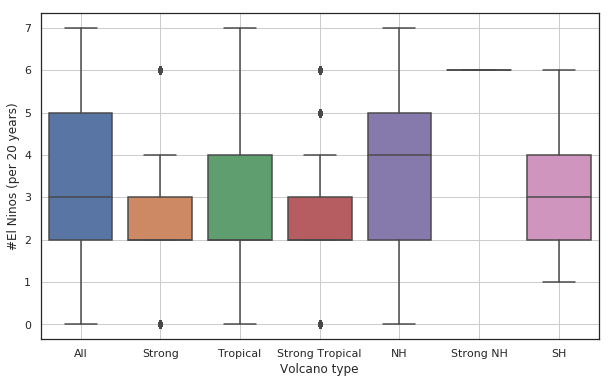

In [23]:
# ENSO has a 2-7 year cycle so El Nino can come every 4-5 years, hence 2 El Ninos per 10 years 
import pandas as pd 
import seaborn as sns
data1 = pd.DataFrame({ 'Volcano type' : np.repeat('All',N), '#El Ninos (per 20 years)': count_elnino_all_volc })
data2 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong',N), '#El Ninos (per 20 years)': count_elnino_strong_volc })
data3 = pd.DataFrame({ 'Volcano type' : np.repeat('Tropical',N), '#El Ninos (per 20 years)': count_elnino_all_trop })
data4 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong Tropical',N), '#El Ninos (per 20 years)': count_elnino_strong_trop })
data5 = pd.DataFrame({ 'Volcano type' : np.repeat('NH',N), '#El Ninos (per 20 years)': count_elnino_all_nh })
data6 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong NH',N), '#El Ninos (per 20 years)': count_elnino_strong_nh })
data7 = pd.DataFrame({ 'Volcano type' : np.repeat('SH',N), '#El Ninos (per 20 years)': count_elnino_all_sh })
#data8 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong SH',N), 'Count (per 10 years)': count_elnino_strong_sh })


df=data1.append(data2).append(data3).append(data4).append(data5).append(data6).append(data7)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='Volcano type', y='#El Ninos (per 20 years)', data=df)
plt.grid()

In [24]:
# Bootstrap
N = 1000
win = 20
count_lanina_all_volc = np.zeros((N))
count_lanina_strong_volc  = np.zeros((N))
count_lanina_all_trop  = np.zeros((N))
count_lanina_strong_trop  = np.zeros((N))
count_lanina_all_nh  = np.zeros((N))
count_lanina_strong_nh  = np.zeros((N))
count_lanina_all_sh  = np.zeros((N))

In [25]:
niter = 0
while niter<N:
    rand_year_all = random.sample(list(idx_all[0]), 1)
    if (rand_year_all[0]<event_ln_li.shape[0]-win):
        count_lanina_all_volc[niter] = np.sum(event_ln_li[rand_year_all[0]:rand_year_all[0]+win])
    
    rand_year_strong = random.sample(list(idx_strong[0]), 1)
    if (rand_year_strong[0]<event_ln_li.shape[0]-win):
        count_lanina_strong_volc[niter] = np.sum(event_ln_li[rand_year_strong[0]:rand_year_strong[0]+win])
    
    rand_year_all_trop = random.sample(list(idx_all_trop[0]), 1)
    if (rand_year_all_trop[0]<event_ln_li.shape[0]-win):
        count_lanina_all_trop[niter] = np.sum(event_ln_li[rand_year_all_trop[0]:rand_year_all_trop[0]+win])

    rand_year_strong_trop = random.sample(list(idx_strong_trop[0]), 1)
    if (rand_year_strong_trop[0]<event_ln_li.shape[0]-win):
        count_lanina_strong_trop[niter] = np.sum(event_ln_li[rand_year_strong_trop[0]:rand_year_strong_trop[0]+win])

    rand_year_all_nh = random.sample(list(idx_all_nh[0]), 1)
    if (rand_year_all_nh[0]<event_ln_li.shape[0]-win):
        count_lanina_all_nh[niter] = np.sum(event_ln_li[rand_year_all_nh[0]:rand_year_all_nh[0]+win])

    rand_year_strong_nh = random.sample(list(idx_strong_nh[0]), 1)
    if (rand_year_strong_nh[0]<event_ln_li.shape[0]-win):
        count_lanina_strong_nh[niter] = np.sum(event_ln_li[rand_year_strong_nh[0]:rand_year_strong_nh[0]+win])

    rand_year_all_sh = random.sample(list(idx_all_sh[0]), 1)
    if (rand_year_all_sh[0]<event_ln_li.shape[0]-win):
        count_lanina_all_sh[niter] = np.sum(event_ln_li[rand_year_all_sh[0]:rand_year_all_sh[0]+win])
    
    #print(s[rand_year_all[0]:rand_year_all[0]+win])
    #print(rand_year_all[0])
    niter = niter + 1 

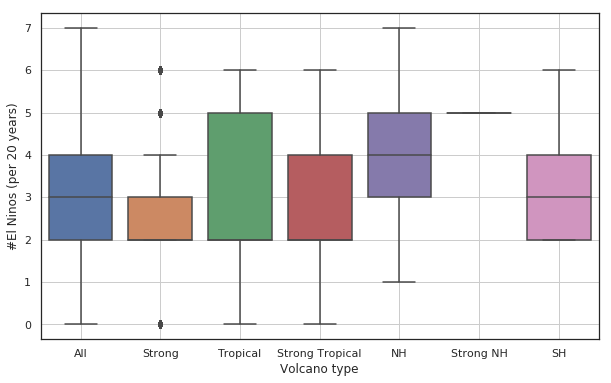

In [26]:
# ENSO has a 2-7 year cycle so El Nino can come every 4-5 years, hence 2 El Ninos per 10 years 
import pandas as pd 
import seaborn as sns
data1 = pd.DataFrame({ 'Volcano type' : np.repeat('All',N), '#El Ninos (per 20 years)': count_lanina_all_volc })
data2 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong',N), '#El Ninos (per 20 years)': count_lanina_strong_volc })
data3 = pd.DataFrame({ 'Volcano type' : np.repeat('Tropical',N), '#El Ninos (per 20 years)': count_lanina_all_trop })
data4 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong Tropical',N), '#El Ninos (per 20 years)': count_lanina_strong_trop })
data5 = pd.DataFrame({ 'Volcano type' : np.repeat('NH',N), '#El Ninos (per 20 years)': count_lanina_all_nh })
data6 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong NH',N), '#El Ninos (per 20 years)': count_lanina_strong_nh })
data7 = pd.DataFrame({ 'Volcano type' : np.repeat('SH',N), '#El Ninos (per 20 years)': count_lanina_all_sh })
#data8 = pd.DataFrame({ 'Volcano type' : np.repeat('Strong SH',N), 'Count (per 10 years)': count_elnino_strong_sh })


df=data1.append(data2).append(data3).append(data4).append(data5).append(data6).append(data7)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='Volcano type', y='#El Ninos (per 20 years)', data=df)
plt.grid()

In [27]:
nino3_li_2013_anom_yy = np.zeros((nino3_li_2013_filt.shape[0],3))
nino3_li_2013_anom_yy[:,0] = year_li_2013[:]
nino3_li_2013_anom_yy[:,1] = event_yy_volc_strong[:]
nino3_li_2013_anom_yy[:,2] = nino3_li_2013_filt[:]
np.savetxt('nino3_li_2013_anom_yy.txt', nino3_li_2013_anom_yy, delimiter=",")